In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
import plotly.express as px
import warnings



# 1st Extract Data 

In [98]:
df = pd.read_csv("C:\\Users\\user\\3D Objects\\Exploratory-Data-Analysis-EDA-\\EDA_amazon_data\\Amazon_Sale_Report\\Amazon_Sale_Report.csv", low_memory=False)
df.head(10)

index             Order ID      Date                        Status   
0      0  405-8078784-5731545  04-30-22                     Cancelled  \
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   
5      5  404-1490984-4578765  04-30-22                       Shipped   
6      6  408-5748499-6859555  04-30-22                       Shipped   
7      7  406-7807733-3785945  04-30-22  Shipped - Delivered to Buyer   
8      8  407-5443024-5233168  04-30-22                     Cancelled   
9      9  402-4393761-0311520  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style                  SKU   
0   Merchant      Amazon.in           Standard   SET389       SET389-KR-NP-S  \
1   Merchant      Amazon.in           Standard  JNE3781      JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371        JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341           J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671      JNE3671-TU-XXXL   
5     Amazon      Amazon.in          Expedited   SET264      SET264-KR-NP-XL   
6     Amazon      Amazon.in          Expedited    J0095          J0095-SET-L   
7   Merchant      Amazon.in           Standard  JNE3405         JNE3405-KR-S   
8     Amazon      Amazon.in          Expedited   SET200  SET200-KR-NP-A-XXXL   
9     Amazon      Amazon.in          Expedited  JNE3461       JNE3461-KR-XXL   

        Category  ... currency  Amount    ship-city     ship-state   
0            Set  ...      INR  647.62       MUMBAI    MAHARASHTRA  \
1          kurta  ...      INR  406.00    BENGALURU      KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI    MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY     PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI     TAMIL NADU   
5            Set  ...      INR  824.00    GHAZIABAD  UTTAR PRADESH   
6            Set  ...      INR  653.00   CHANDIGARH     CHANDIGARH   
7          kurta  ...      INR  399.00    HYDERABAD      TELANGANA   
8            Set  ...      NaN     NaN    HYDERABAD      TELANGANA   
9          kurta  ...      INR  363.00      Chennai     TAMIL NADU   

  ship-postal-code  ship-country   
0         400081.0            IN  \
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   
5         201102.0            IN   
6         160036.0            IN   
7         500032.0            IN   
8         500008.0            IN   
9         600041.0            IN   

                                       promotion-ids    B2B  fulfilled-by   
0                                                NaN  False     Easy Ship  \
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   
5       IN Core Free Shipping 2015/04/08 23-48-5-108  False           NaN   
6       IN Core Free Shipping 2015/04/08 23-48-5-108  False           NaN   
7  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
8       IN Core Free Shipping 2015/04/08 23-48-5-108  False           NaN   
9                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  

[10 rows x 24 columns]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [100]:
duplicate_counts = {col: len(df) - df[col].nunique() for col in df.columns}

# Display the count of duplicate values for each column
for col, count in duplicate_counts.items():
    print(f"Column: {col}, Duplicate Values: {count}")


Column: index, Duplicate Values: 0
Column: Order ID, Duplicate Values: 8597
Column: Date, Duplicate Values: 128884
Column: Status, Duplicate Values: 128962
Column: Fulfilment, Duplicate Values: 128973
Column: Sales Channel , Duplicate Values: 128973
Column: ship-service-level, Duplicate Values: 128973
Column: Style, Duplicate Values: 127598
Column: SKU, Duplicate Values: 121780
Column: Category, Duplicate Values: 128966
Column: Size, Duplicate Values: 128964
Column: ASIN, Duplicate Values: 121785
Column: Courier Status, Duplicate Values: 128972
Column: Qty, Duplicate Values: 128965
Column: currency, Duplicate Values: 128974
Column: Amount, Duplicate Values: 127565
Column: ship-city, Duplicate Values: 120020
Column: ship-state, Duplicate Values: 128906
Column: ship-postal-code, Duplicate Values: 119516
Column: ship-country, Duplicate Values: 128974
Column: promotion-ids, Duplicate Values: 123188
Column: B2B, Duplicate Values: 128973
Column: fulfilled-by, Duplicate Values: 128974
Column:

In [101]:
df[["index","currency","ship-country","fulfilled-by","Unnamed: 22","promotion-ids"]].nunique()

index            128975
currency              1
ship-country          1
fulfilled-by          1
Unnamed: 22           1
promotion-ids      5787
dtype: int64

<Axes: >

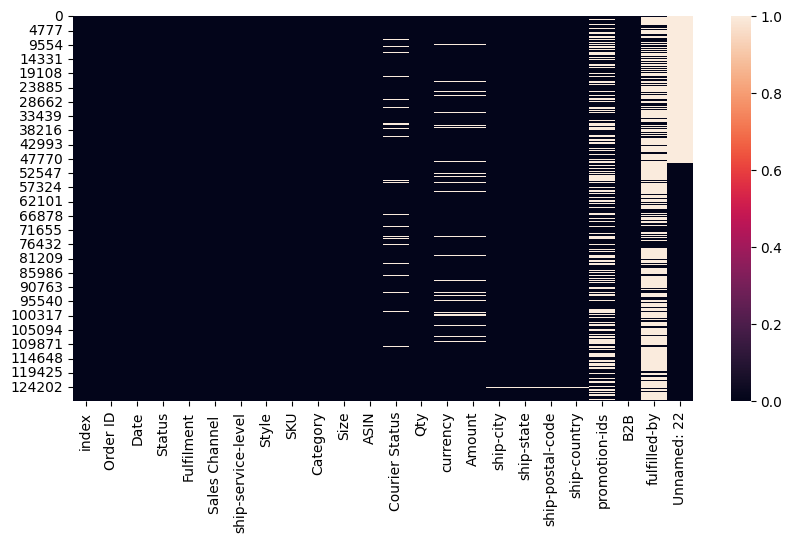

In [102]:
miss_values = [f for f in df.columns if df[f].isnull().sum()>0]
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=True)

In [103]:
miss_values = [f for f in df.columns if df[f].isnull().sum()>0]
miss_values

['Courier Status',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'promotion-ids',
 'fulfilled-by',
 'Unnamed: 22']

In [104]:
df.describe()

index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128942.000000
mean    64487.000000       0.904431     648.561465     463966.236509
std     37232.019822       0.313354     281.211687     191476.764941
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

In [105]:
numerical_data = df.select_dtypes(include=['number'])


In [106]:
def central_tendency(df):
    for column in df.columns:
        print(f"Column: {column}")
        print(f"Mean : {df[column].mean()}")
        print(f"Median : {df[column].median()}")
        print(f"Mode : {df[column].mode()[0]},\n")

central_tendency(numerical_data)

Column: index
Mean : 64487.0
Median : 64487.0
Mode : 0,

Column: Qty
Mean : 0.9044310912967629
Median : 1.0
Mode : 1,

Column: Amount
Mean : 648.5614647631621
Median : 605.0
Mode : 399.0,

Column: ship-postal-code
Mean : 463966.2365094384
Median : 500033.0
Mode : 201301.0,



In [107]:
def check_skewness(df):
    skewness = {}
    for column in df.columns:
        skew_value = skew(df[column].dropna())
        if abs(skew_value) > 2:
            skewness[column] = 'Highly Skewed'
        elif abs(skew_value) > 1:
            skewness[column] = 'Moderately Skewed'
        else:
            skewness[column] = 'Lightly Skewed'
    return skewness

skewness_info = check_skewness(numerical_data)


skewness_info

{'index': 'Lightly Skewed',
 'Qty': 'Lightly Skewed',
 'Amount': 'Lightly Skewed',
 'ship-postal-code': 'Lightly Skewed'}

In [108]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_info = detect_outliers_iqr(numerical_data)

print(outliers_info)

{'index': Empty DataFrame
Columns: [index, Qty, Amount, ship-postal-code]
Index: [], 'Qty':          index  Qty  Amount  ship-postal-code
0            0    0  647.62          400081.0
3            3    0  753.33          605008.0
8            8    0     NaN          500008.0
23          23    0  570.48          411044.0
29          29    0     NaN          781003.0
...        ...  ...     ...               ...
128907  128907    0     NaN          201306.0
128908  128908    0     NaN          201306.0
128956  128956    2  992.00          600042.0
128958  128958    0     NaN          560037.0
128967  128967    0     NaN          700040.0

[13195 rows x 4 columns], 'Amount':          index  Qty  Amount  ship-postal-code
102        102    1  1338.0          421502.0
146        146    1  1399.0          225001.0
243        243    1  1338.0          700051.0
265        265    2  2130.0          400101.0
299        299    1  1463.0          401107.0
...        ...  ...     ...               .

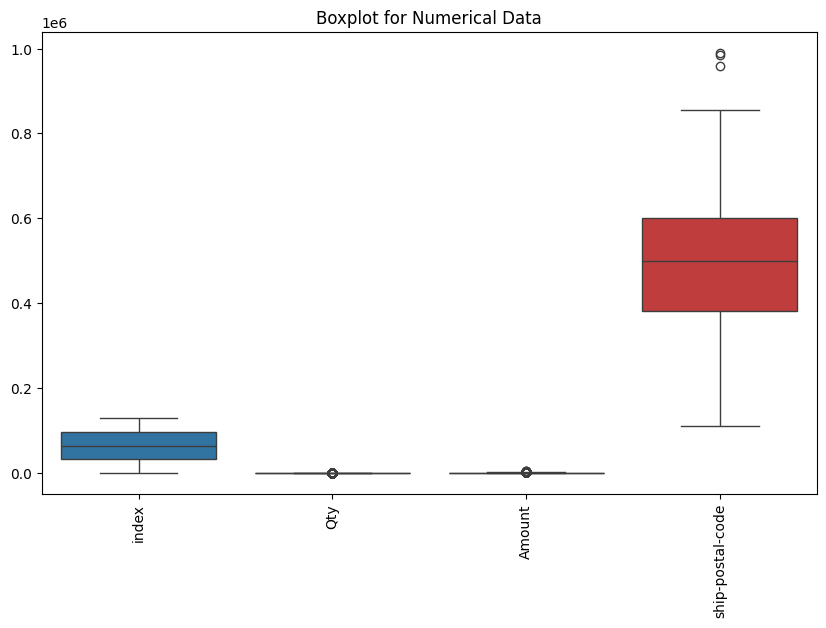

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data)
plt.title("Boxplot for Numerical Data")
plt.xticks(rotation=90)  
plt.show()

In [110]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_data_standard = scaler_standard.fit_transform(numerical_data)
scaled_data_minmax = scaler_minmax.fit_transform(numerical_data)

In [111]:
scaled_data_standard

array([[-1.73203738, -2.88630684, -0.0033479 , -0.33364614],
       [-1.73201052,  0.30498862, -0.86256182,  0.50198851],
       [-1.73198366,  0.30498862, -1.13637803, -0.28074657],
       ...,
       [ 1.73198366,  0.30498862,  0.1473577 ,  0.18844534],
       [ 1.73201052,  0.30498862,  1.95738951, -0.38968971],
       [ 1.73203738,  0.30498862,  0.16869402,  0.14648186]])

In [112]:
scaled_data_minmax

array([[0.00000000e+00, 0.00000000e+00, 1.15977794e-01, 3.29674951e-01],
       [7.75350071e-06, 6.66666667e-02, 7.27077364e-02, 5.11518962e-01],
       [1.55070014e-05, 6.66666667e-02, 5.89183381e-02, 3.41186525e-01],
       ...,
       [9.99984493e-01, 6.66666667e-02, 1.23567335e-01, 4.43288249e-01],
       [9.99992246e-01, 6.66666667e-02, 2.14720630e-01, 3.17479205e-01],
       [1.00000000e+00, 6.66666667e-02, 1.24641834e-01, 4.34156498e-01]])

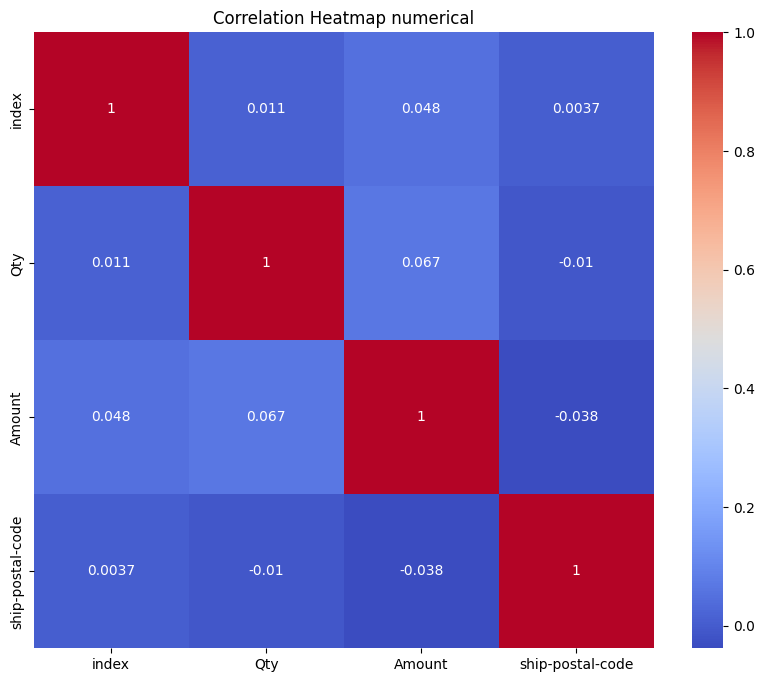

In [113]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap numerical")
plt.show()

In [114]:
categorical_data = df.select_dtypes(exclude=['number'])


In [115]:
encoded_categorical_data = categorical_data.apply(LabelEncoder().fit_transform)


In [116]:
concat_df = pd.concat([numerical_data, encoded_categorical_data], axis=1)

concat_df

index  Qty   Amount  ship-postal-code  Order ID  Date  Status   
0            0    0   647.62          400081.0     70508    30       0  \
1            1    1   406.00          560085.0     13615    30       5   
2            2    1   329.00          410210.0     45301    30       3   
3            3    0   753.33          605008.0     43682    30       0   
4            4    1   574.00          600073.0     90099    30       3   
...        ...  ...      ...               ...       ...   ...     ...   
128970  128970    1   517.00          500013.0     82419    61       3   
128971  128971    1   999.00          122004.0     28755    61       3   
128972  128972    1   690.00          500049.0    102430    61       3   
128973  128973    1  1199.00          389350.0     23834    61       3   
128974  128974    1   696.00          492014.0    115818    61       3   

        Fulfilment  Sales Channel   ship-service-level  ...  ASIN   
0                1               0                   1  ...  5563  \
1                1               0                   1  ...  5277   
2                0               0                   0  ...   675   
3                1               0                   1  ...  4638   
4                0               0                   0  ...  4351   
...            ...             ...                 ...  ...   ...   
128970           0               0                   0  ...  3961   
128971           0               0                   0  ...  6834   
128972           0               0                   0  ...  4072   
128973           0               0                   0  ...  1321   
128974           0               0                   0  ...  1279   

        Courier Status  currency  ship-city  ship-state  ship-country   
0                    3         0       4795          28             0  \
1                    1         0        776          23             0   
2                    1         0       5353          28             0   
3                    3         0       6140          43             0   
4                    1         0       1466          56             0   
...                ...       ...        ...         ...           ...   
128970               1         0       2906          57             0   
128971               1         0       2620          19             0   
128972               1         0       2906          57             0   
128973               1         0       2938          18             0   
128974               1         0       6702          11             0   

        promotion-ids  B2B  fulfilled-by  Unnamed: 22  
0                5787    0             0            1  
1                2051    0             0            1  
2                5766    1             1            1  
3                5787    0             0            1  
4                5787    0             1            1  
...               ...  ...           ...          ...  
128970           5787    0             1            0  
128971           5766    0             1            0  
128972           5787    0             1            0  
128973           5766    0             1            0  
128974           5766    0             1            0  

[128975 rows x 24 columns]

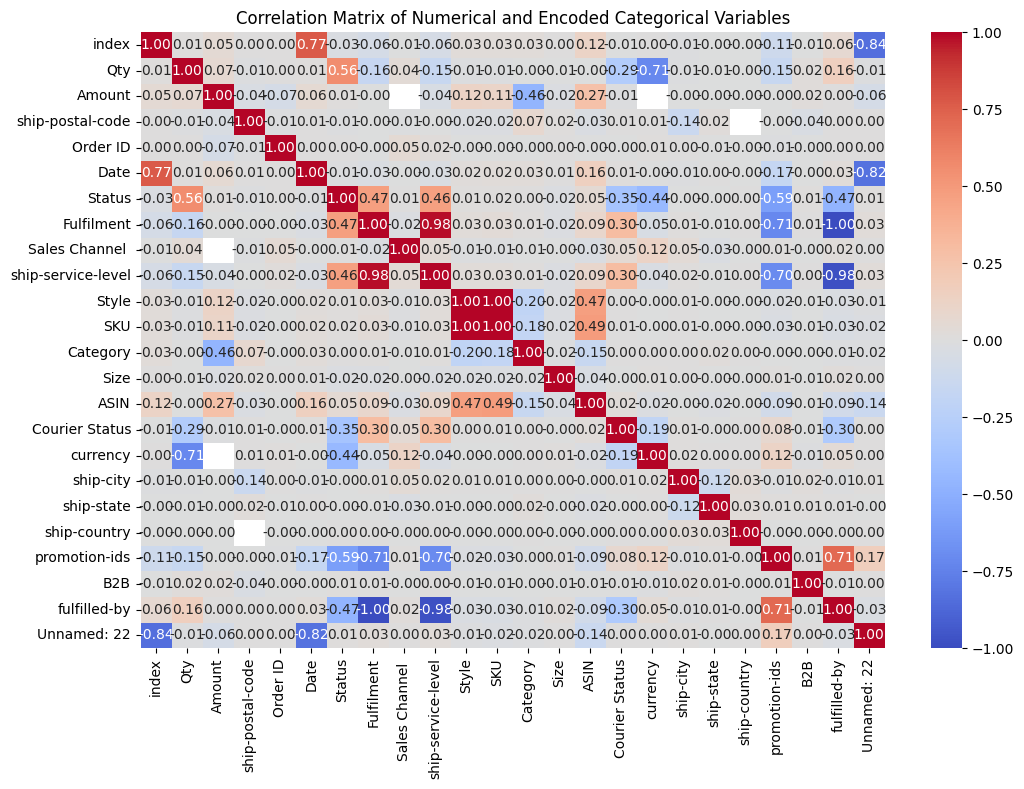

In [117]:
correlation_matrix = concat_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical and Encoded Categorical Variables')
plt.show()

# 2nd Transfrom Data

In [118]:
df.drop(columns=["index","currency","ship-country","fulfilled-by","Unnamed: 22","promotion-ids"], inplace=True)

df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [119]:
df.drop_duplicates().sample(10)

Order ID      Date   Status Fulfilment Sales Channel    
77563   408-5303300-0758706  05-08-22  Shipped     Amazon      Amazon.in  \
32965   402-6262442-8491544  04-10-22  Shipped     Amazon      Amazon.in   
98747   408-4311727-1850720  06-22-22  Shipped     Amazon      Amazon.in   
34341   407-7381425-8422731  04-10-22  Shipped     Amazon      Amazon.in   
75388   403-7774124-8743542  05-10-22  Shipped     Amazon      Amazon.in   
84811   405-2831580-4241957  05-04-22  Shipped     Amazon      Amazon.in   
120182  408-1652217-5180364  06-06-22  Shipped     Amazon      Amazon.in   
67906   171-9910793-2574722  05-16-22  Shipped     Amazon      Amazon.in   
61629   405-6705412-0261949  05-22-22  Shipped     Amazon      Amazon.in   
97511   171-3496895-5553117  06-23-22  Shipped     Amazon      Amazon.in   

       ship-service-level     Style                SKU Category Size   
77563           Expedited    SET277     SET277-KR-NP-M      Set    M  \
32965           Expedited    SET304    SET304-KR-DPT-S      Set    S   
98747           Expedited     J0349     J0349-SET-XXXL      Set  3XL   
34341           Expedited   JNE3691       JNE3691-TU-M      Top    M   
75388           Expedited  PJNE3440  PJNE3440-KR-N-4XL    kurta  4XL   
84811           Expedited   JNE3421     JNE3421-KR-N-L    kurta    L   
120182          Expedited     J0117       J0117-TP-XXL      Top  XXL   
67906           Expedited   MEN5032       MEN5032-KR-S    kurta    S   
61629           Expedited   JNE3645     JNE3645-TP-N-M      Top    M   
97511           Expedited    SET327    SET327-KR-DPT-M      Set    M   

              ASIN Courier Status  Qty  Amount   ship-city     ship-state   
77563   B0983FZW13        Shipped    1  1268.0      KANPUR  UTTAR PRADESH  \
32965   B09K3JVNR1        Shipped    1  1115.0  COIMBATORE     TAMIL NADU   
98747   B099NJBZMD        Shipped    1   845.0   Hyderabad      TELANGANA   
34341   B0986YS2YT        Shipped    1   625.0   BENGALURU      KARNATAKA   
75388   B09LD4DX25        Shipped    1   925.0   NEW DELHI          DELHI   
84811   B08TRHPCDQ        Shipped    1   399.0        PUNE    MAHARASHTRA   
120182  B08N4XHHCQ        Shipped    1   726.0   GHAZIABAD  UTTAR PRADESH   
67906   B08YYXJJ4V        Shipped    1   811.0   BENGALURU      KARNATAKA   
61629   B08ZHSXP1S        Shipped    1   493.0      MUMBAI    MAHARASHTRA   
97511   B09PN41YXK        Shipped    1   999.0   HYDERABAD      TELANGANA   

        ship-postal-code    B2B  
77563           208021.0  False  
32965           641001.0  False  
98747           501218.0  False  
34341           560102.0  False  
75388           110043.0  False  
84811           411038.0  False  
120182          201016.0  False  
67906           560019.0  False  
61629           400060.0  False  
97511           500085.0  False

In [120]:
df.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
B2B                      0
dtype: int64

In [121]:
df.rename(columns={"Sales Channel" : "Sales_Channel", "Courier Status" : "Courier_Status", "Order ID" : "Order_ID" }, inplace=True)

df.columns

Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [122]:
df.columns = df.columns.str.strip()

df.rename(columns={'Sales Channel': 'Sales_Channel'}, inplace=True)

df.columns


Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [123]:
df[["ship-city", "ship-state"]] = df[["ship-city", "ship-state"]].fillna(method="ffill").reset_index(drop=True)


pd.options.mode.chained_assignment = None  # Disable the warning


In [124]:
df['ship-postal-code'].fillna(method='bfill',inplace=True)


In [125]:
df.fillna({'Amount' : df['Amount'].mean()}, inplace=True)

In [126]:
df['Courier_Status'] = df['Courier_Status'].fillna(df['Courier_Status'].mode()[0])

In [127]:
df['Date'] = pd.to_datetime(df['Date'])

pd.options.mode.chained_assignment = None  # Disable the warning



In [128]:
df.isnull().sum()

Order_ID              0
Date                  0
Status                0
Fulfilment            0
Sales_Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier_Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
B2B                   0
dtype: int64

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order_ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales_Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier_Status      128975 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  Amount              128975 no

# 3rd finding insigth

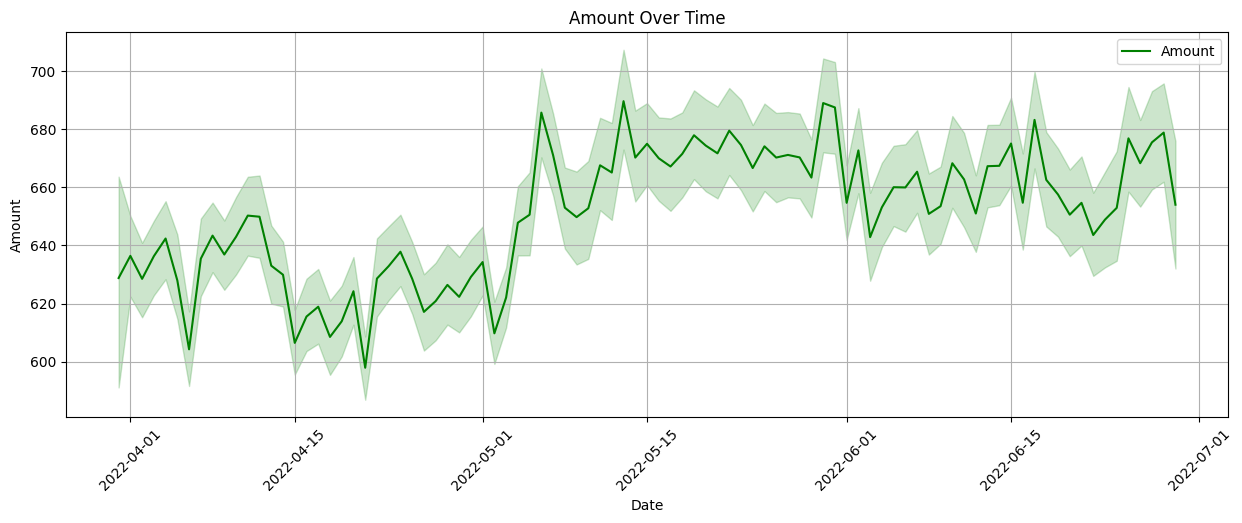

In [130]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Amount', label='Amount', color='green')
plt.title('Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

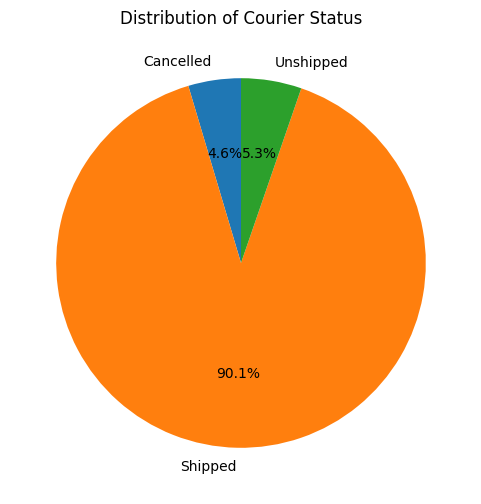

In [131]:
courier_data = df.groupby('Courier_Status')['Amount'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(courier_data, labels=courier_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Courier Status')
plt.show()

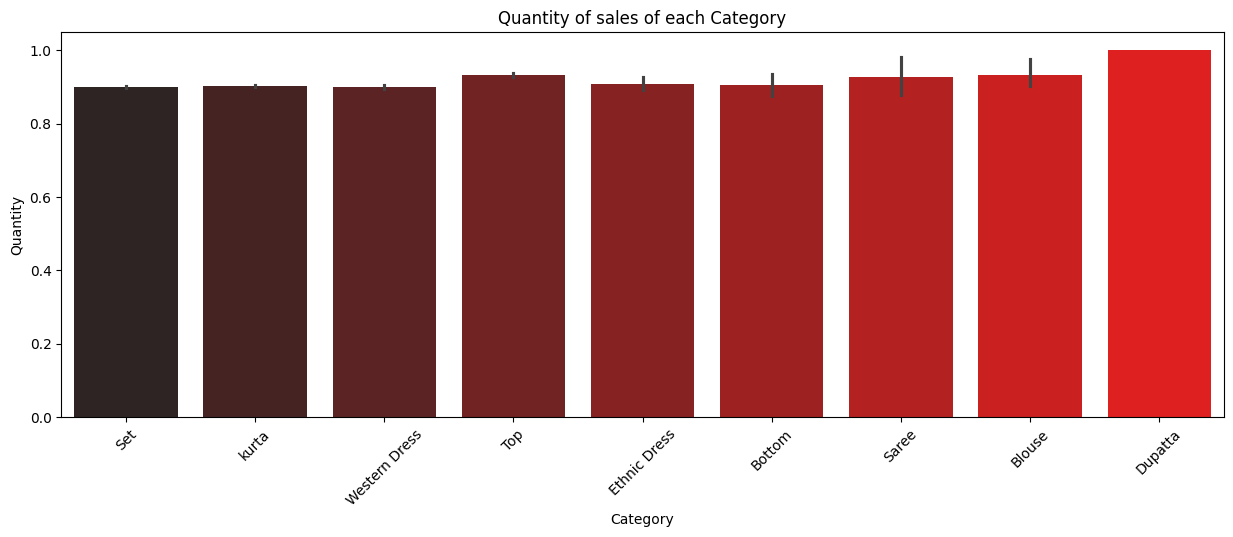

In [132]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category',y='Qty',data=df,palette="dark:red")
plt.title('Quantity of sales of each Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

warnings.filterwarnings("ignore")


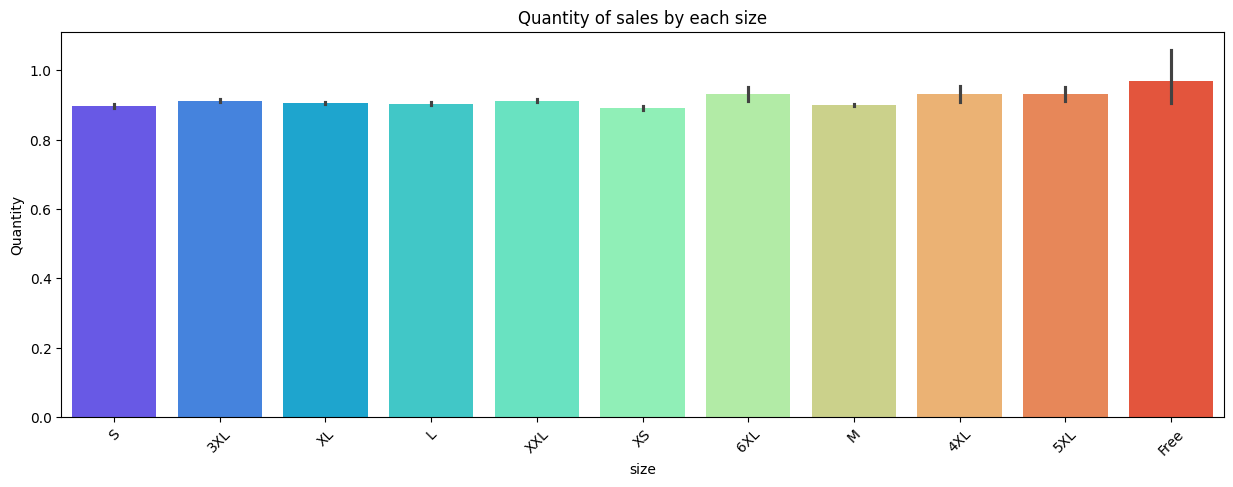

In [133]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Size", y="Qty", data=df, palette ='rainbow', hue="Size")
plt.title('Quantity of sales by each size')
plt.xlabel('size')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

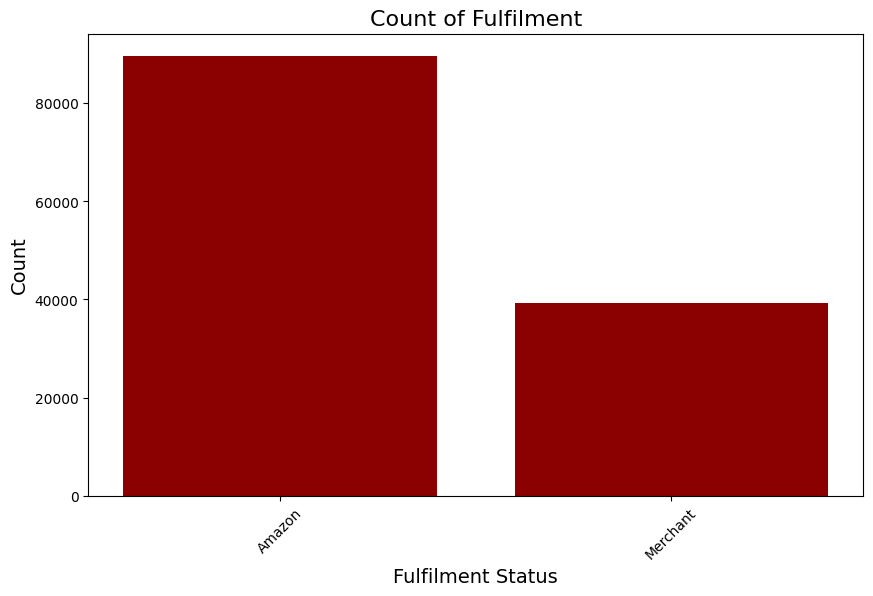

In [134]:
count_data = df['Fulfilment'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(count_data.index, count_data.values, color='darkred')
plt.title('Count of Fulfilment', fontsize=16)
plt.xlabel('Fulfilment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()



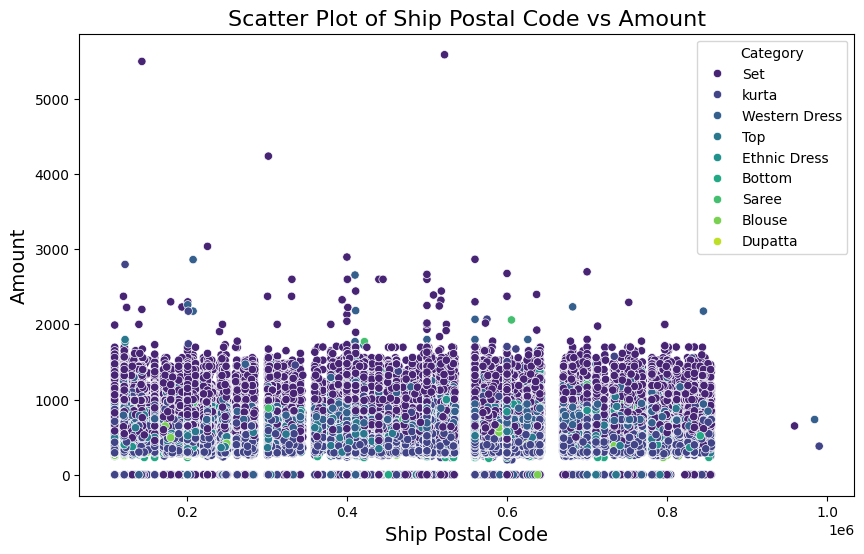

In [135]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ship-postal-code', y='Amount',  hue='Category', data=df, palette='viridis', sizes=(50, 200))

# Adding title and labels
plt.title('Scatter Plot of Ship Postal Code vs Amount', fontsize=16)
plt.xlabel('Ship Postal Code', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Show legend
plt.legend(title='Category')

# Show the plot
plt.show()

In [136]:
fig = px.bar(df, x="Date", y="B2B", color="Category", hover_name="Size", color_continuous_scale="ice")
fig.show()